# Handling Text Data

Below are a few examples of how to play with text data. We'll walk through some exercises in class with this!

In [99]:
import pandas as pd

text_data = pd.read_csv("pa3_orig/Bills Mafia.csv")

In [100]:
text_data.head()

,id,text,label
0,1423946923560640514,I haven’t seen a single story about a vaccinat...,NaN
1,1415395068102467588,WHAT IS GRAPHENE OXIDE? Main Ingredient in Pfi...,NaN
2,1395622329376444416,MO: Vaccine appointments available at Walgreen...,NaN
3,1378272239687065610,PETITION: No to mandatory vaccination for the ...,NaN
4,1425352057050091521,CDC açıkladı: Moderna ve Pfizer-BioNTech aşısı...,NaN


In [101]:
documents = [t for t in text_data.text]

In [103]:
documents[0]

'I haven’t seen a single story about a vaccinated person who caught Covid and wished they hadn’t got the vaccine. So weird. 🤔'

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

def fit_vectorizer(vectorizer, sample_doc_index=0, documents= documents):
    X = vectorizer.fit_transform(documents)
    features = vectorizer.get_feature_names()
    print(len(vectorizer.get_feature_names()))
    print("First ten features: {}".format(", ".join(features[:10])))
    print("Sample Doc: {}".format(documents[sample_doc_index]))
    print("Sample Doc Features: {}".format(", ".join([features[i] for i in X[doc_index].nonzero()[1]])))
    return X, features

X, features = fit_vectorizer(CountVectorizer(analyzer='word'))

1586
First ten features: 000, 03, 05, 050, 06, 07719, 102, 104, 11, 117
Sample Doc: I haven’t seen a single story about a vaccinated person who caught Covid and wished they hadn’t got the vaccine. So weird. 🤔
Sample Doc Features: haven, seen, single, story, about, vaccinated, person, who, caught, covid, and, wished, they, hadn, got, the, vaccine, so, weird


Things we also might thing we want:

- Filtering out stuff (what? Why?)
- Characters instead of words (why?)
- Ngrams (huh? Why?)
- ... what else?

In [105]:
X, features = fit_vectorizer(CountVectorizer(analyzer="word",
                    ngram_range=(1, 3), 
                    min_df=10,
                    max_df=0.75, stop_words='english'))

15
First ten features: 19, 19 vaccine, amp, covid, covid 19, covid 19 vaccine, don, just, mandatory, mandatory vaccination
Sample Doc: I haven’t seen a single story about a vaccinated person who caught Covid and wished they hadn’t got the vaccine. So weird. 🤔
Sample Doc Features: vaccinated, covid, vaccine


In [106]:

char_vectorizer = CountVectorizer(analyzer='char', 
                                  ngram_range=(2, 6),
                                    min_df=10, max_df=0.75)
X, features = fit_vectorizer(char_vectorizer)

1186
First ten features:  #,  #c,  #co,  &,  &a,  &am,  &amp,  &amp;,  -,  1
Sample Doc: I haven’t seen a single story about a vaccinated person who caught Covid and wished they hadn’t got the vaccine. So weird. 🤔
Sample Doc Features: i ,  h, ha, av, ve, en, n’, ’t,  s, se, ee, n , a , si, ng, gl, le, st, to, or, ry, y , ab, bo, ou, ut, na, at, te, ed, d ,  p, pe, rs, so, on,  w, wh, ho, o ,  c, ca, au, ug, gh, ht, co, ov, vi, id, an, nd, wi, is, sh, he, th, ey, ad,  g, go, ot, e., . , we, ei, ir, rd, d.,  ha, hav, ave, ven, n’t, ’t ,  se, en , n a,  a , a s,  si, ing, le , e s,  st, tor, ory, ry , y a,  ab, abo, bou, out, ut , t a, a v, ina, nat, ate, ted, ed ,  pe, per, ers, son, on ,  wh, who, ho ,  ca, ugh, ght, t c,  co, cov, ovi, vid, id , d a,  an, and, nd , d w,  wi, ish, d t,  th, the, t g,  go, ot , t t, he , e v, ine, e. , . s,  so, so ,  we,  hav, have, n’t , tory, ory ,  abo, abou, bout, out , a va, cina, inat, nate, ated, ted ,  who, who ,  cov, covi, ovid, vid ,  and, an

In [107]:
import spacy

nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(tweet):
    return ["{}".format(c.lemma_) for c in nlp(tweet)]

In [108]:
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
X, features = fit_vectorizer(vectorizer)

1496
First ten features: 
, 

, 
 ,  , !, ", #, %, &, '
Sample Doc: I haven’t seen a single story about a vaccinated person who caught Covid and wished they hadn’t got the vaccine. So weird. 🤔
Sample Doc Features: I, have, not, see, a, single, story, about, vaccinated, person, who, catch, covid, and, wish, they, get, the, vaccine, ., so, weird, 🤔


# Dimensionality Reduction

## Toy Example (from Varun)

In [53]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

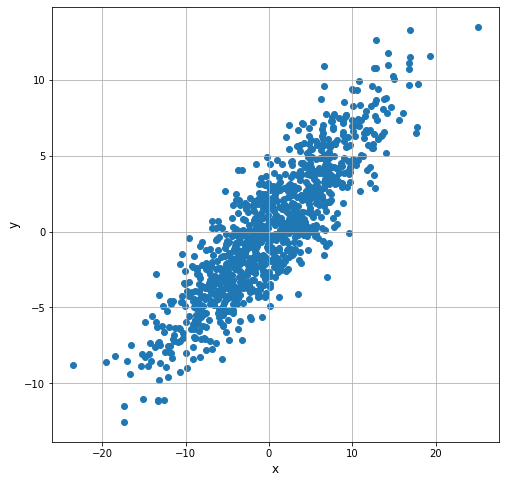

In [54]:
# First generate some data
mu = np.array([0,0])
Sigma = np.array([[ 46.28249177,  26.12496001],
       [ 26.12496001,  19.55457642]])
X = np.random.multivariate_normal(mu,Sigma,1000)
fig = plt.figure(figsize=[8,8])
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(axis='both')

In [55]:
# perform PCA
L,U=np.linalg.eig(Sigma)
# eigenvalues
print(L)
# eigenvectors
U

[62.26319119  3.573877  ]


array([[ 0.85305734, -0.52181718],
       [ 0.52181718,  0.85305734]])

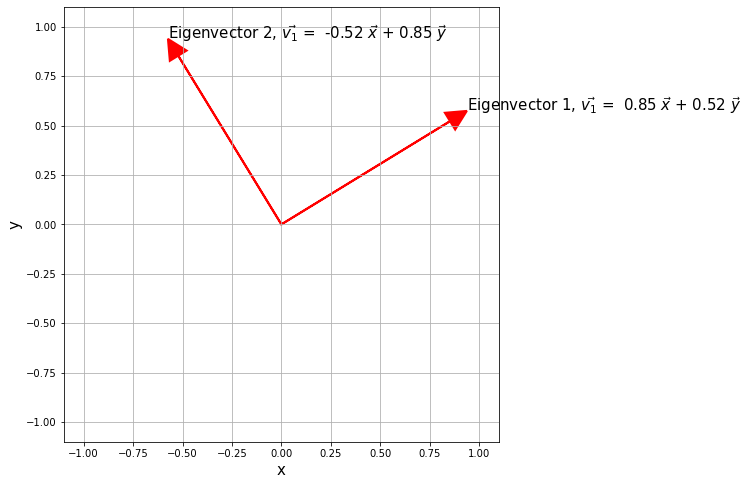

In [56]:
# first plot the eigenvectors
ah=0.1 # size of arrow head
f=1.1 # axes range

plt.figure(figsize=(8,8))
plt.subplot(111,aspect='equal')
plt.arrow(0,0,U[0,0],U[1,0],color='r',linewidth=2,head_width=ah,head_length=ah)
plt.arrow(0,0,U[0,1],U[1,1],color='r',linewidth=2,head_width=ah,head_length=ah)
plt.text(f*U[0,0],f*U[1,0],r'Eigenvector 1, $\vec{v_1}$ =  %.2f $\vec{x}$ + %.2f $\vec{y}$' % (U[0,0],U[1,0]), fontsize=15)
plt.text(f*U[0,1],f*U[1,1],r'Eigenvector 2, $\vec{v_1}$ =  %.2f $\vec{x}$ + %.2f $\vec{y}$' % (U[0,1],U[1,1]), fontsize=15)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.grid()
plt.show()

In [62]:
U[0,0]*math.sqrt(L[0]),U[1,0]*math.sqrt(L[0])

(6.731221989551624, 4.117504307401351)

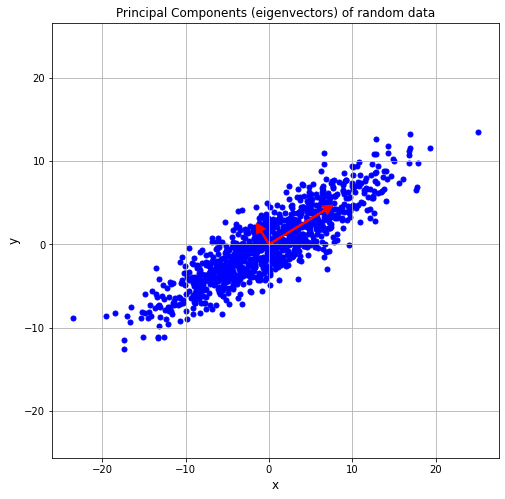

In [68]:
# plot the eigenvectors with the data
plt.figure(figsize=(8,8))
plt.plot(X[:,0],X[:,1],'bo',markersize=5,zorder=0,)
plt.axis('equal')
plt.grid()
plt.title('Principal Components (eigenvectors) of random data', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.arrow(0,0,U[0,0]*math.sqrt(L[0]),U[1,0]*math.sqrt(L[0]),color='r',linewidth=2,head_width=1,head_length=1)
plt.arrow(0,0,U[0,1]*math.sqrt(L[1]),U[1,1]*math.sqrt(L[1]),color='r',linewidth=2,head_width=1,head_length=1)
plt.show()

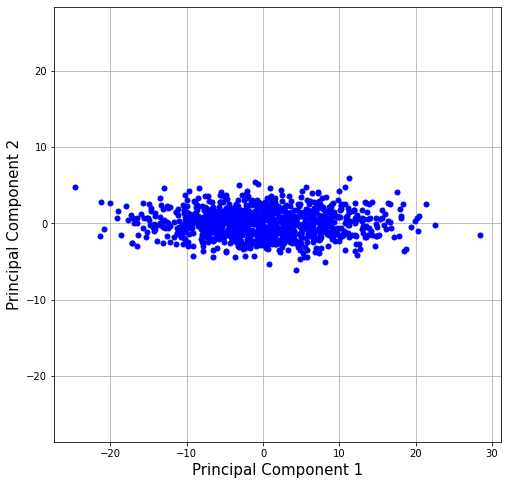

In [69]:
# projecting data onto the principal components (no dimensionality reduction here)
Z = np.dot(X,U)
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.grid()
plt.plot(Z[:,0],Z[:,1],'bo',markersize=5)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
plt.show()

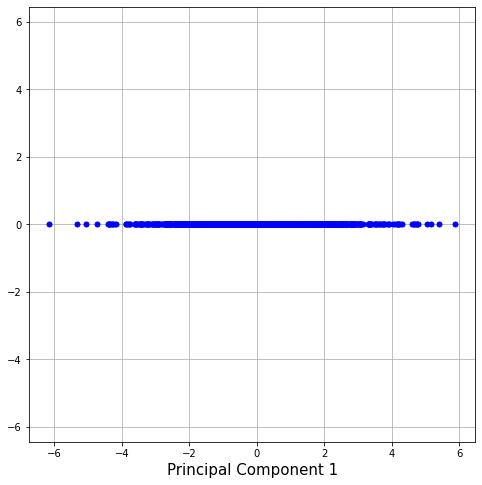

In [70]:
# projecting data onto the first principal component
Z = np.dot(X,U[:,1])
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.grid()
plt.plot(Z,np.zeros([len(Z),]),'bo',markersize=5)
plt.xlabel('Principal Component 1',fontsize=15)
#plt.ylabel('Principal Component 2',fontsize=15)
plt.show()

# Applying PCA to text data: An exercise

In [109]:
from sklearn.decomposition import PCA

In [110]:
data = pd.read_csv("notebooks/programming_assignments/474_s22_assignments/assignment1/part2_data.csv")

In [111]:
data.head()

,created_utc,is_crosspostable,is_self,is_video,locked,media_only,over_18,score,subreddit_id,subreddit_name_prefixed,...,title,permalink,total_awards_received,downs,gilded,num_comments,num_crossposts,num_reports,ups,author_name
0,1.582163e+09,False,True,False,False,False,False,146606,t5_2qh72,r/Jokes,...,Sad News: The founder of /r/jokes has passed away,/r/Jokes/comments/f6lii3/sad_news_the_founder_...,200,0,5,1699,9,NaN,146606,error521
1,1.511295e+09,False,True,False,False,False,False,137607,t5_2qh72,r/Jokes,...,Calm down about the Net Neutrality thing...,/r/Jokes/comments/7ekt23/calm_down_about_the_n...,15,0,2,1614,2,NaN,137607,Victorinox2
2,1.499278e+09,False,True,False,False,False,False,108795,t5_2qh72,r/Jokes,...,V,/r/Jokes/comments/6lfqep/v/,29,0,7,1360,1,NaN,108795,MadGo
3,1.565449e+09,False,True,False,False,False,True,105444,t5_2qh72,r/Jokes,...,If your surprised that Jeffrey Epstein commite...,/r/Jokes/comments/coj45m/if_your_surprised_tha...,48,0,11,2418,7,NaN,105444,williseeyoutonight
4,1.539007e+09,False,True,False,False,False,False,100954,t5_2qh72,r/Jokes,...,A new Navy recruit has his first day on the su...,/r/Jokes/comments/9mf1cz/a_new_navy_recruit_ha...,25,0,9,772,6,NaN,100954,Ckarini


In [112]:
X, features = fit_vectorizer(CountVectorizer(analyzer="word",
                    ngram_range=(1, 3), 
                    min_df=10,
                    max_df=0.75, stop_words='english'),
                    documents = data.title)

4385
First ten features: 00, 000, 000 000, 000 people, 000 year, 000 year old, 000 years, 10, 10 000, 10 year
Sample Doc: Sad News: The founder of /r/jokes has passed away
Sample Doc Features: sad, news, founder, jokes, passed, away, passed away


In [114]:
len(data), X.shape, len(features)

(22968, (22968, 4385), 4385)

In [83]:
pca = PCA(n_components=10)
pca.fit(X.todense())
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.00862574 0.00802593 0.00671485 0.00617165 0.00592767 0.00550524
 0.00543801 0.00515872 0.00486338 0.00459951]
[39.32616771 37.93421342 34.69778603 33.26473823 32.60058205 31.41749398
 31.22506739 30.41265079 29.52926968 28.71701003]


In [90]:
components = pca.components_

In [96]:
df = pd.DataFrame({"feature": features, "PC1": components[0,:], "PC2": components[1,:]})

In [98]:
df.sort_values("PC2")

,feature,PC1,PC2
4327,wp,0.304592,-0.309737
4356,years,0.338600,-0.272100
2703,old,0.220882,-0.183783
2132,just,0.177622,-0.171714
4350,year,0.221643,-0.156942
...,...,...,...
3795,suggests,0.065526,0.089920
1537,finds,0.068925,0.094339
2628,new study,0.129852,0.181214
3765,study,0.195533,0.267339
